### 기본 라이브러리

In [1]:
import json
import os

### 크롤링 라이브러리

In [2]:
import requests
from bs4 import BeautifulSoup

### konlpy 라이브러리
##### https://konlpy.org/ko/latest/index.html#guide
##### 경제 분석을 위해 특별히 설계된 한국어 자연어 처리(NLP) Python 라이브러리

In [3]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Okt
from pprint import pprint

### eKoNLPy 라이브러리 
##### Korean NLP Python Library for Economic Analysis
##### https://github.com/entelecheia/eKoNLPy#ekonlpy-korean-nlp-python-library-for-economic-analysis

In [4]:
from ekonlpy import Mecab

### 전처리 라이브러리
##### https://wikidocs.net/22488
##### https://www.nltk.org/index.html
##### NLTK : 분류, 토큰화, 형태소 분석, 태그 지정, 구문 분석 및 의미론적 추론 기능

In [5]:
import nltk

### 시각화 라이브러리

In [6]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
%matplotlib inline

### 폰트 설정(굴림)

In [7]:
Gulim = fm.FontProperties(fname='c:/windows/fonts/gulim.ttc').get_name()

#### 데이터 전처리

In [8]:
import numpy as np

### 모델링

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

### 상수 선언부

In [48]:
'''크롤링 부분 상수'''
DATE = 0
TITLE = 1
VIEWS = 2
POS = 3
NEG = 4

'''데이터 모델링 상수'''
WORD_COUNT = 100

### 네이버 댓글 크롤링

In [11]:
def get_comments(stock, page):
  headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36'}
  url = f'https://finance.naver.com/item/board.naver?code={stock}&page='
  # 삼성전자 예시) https://finance.naver.com/item/board.naver?code=005930&page=1

  reviews = list()

  for page in range(1, page + 1):   
      data = requests.get(url+str(page),headers=headers)
      soup = BeautifulSoup(data.content.decode('euc-kr','replace'), 'html.parser')
      lis = soup.find('table', {'class':'type2'}).select('tbody > tr') # 종토방 종목 게시글 테이블 리스트 
    
      for i in range(2, len(lis)):  # 첫번째는 의미 없는 데이터라서 제외 
        review = list()
        if len(lis[i].select('td > span')) > 0 : # 댓글 5개 마다 있는 구분선 제외 
            
            date = lis[i].select('td > span')[0].text # 날짜 
            title = lis[i].select('td.title > a')[0]['title'] # 제목 
            views = lis[i].select('td > span')[1].text # 조회 
            pos = lis[i].select('td > strong')[0].text # 공감  
            neg = lis[i].select('td > strong')[1].text # 비공감 

            #print(date, title, views, pos, neg)
            review = [date, title, views, pos, neg]
            #print(review)
            reviews.append([date, title, views, pos, neg])

  return reviews

### 크롤링한 텍스트 토큰화 모듈

In [12]:
def tokenize(doc):
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)] 

### tag Package
https://konlpy.org/ko/latest/api/konlpy.tag/

In [13]:
kkma = Kkma()

In [14]:
okt = Okt()

In [15]:
pprint(kkma.pos(u'이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요'))

[('이', 'MDT'),
 ('밤', 'NNG'),
 ('그날', 'NNG'),
 ('의', 'JKG'),
 ('반딧불', 'NNG'),
 ('을', 'JKO'),
 ('당신', 'NP'),
 ('의', 'JKG'),
 ('창', 'NNG'),
 ('가까이', 'MAG'),
 ('보내', 'VV'),
 ('ㄹ게요', 'EFN')]


In [16]:
pprint(okt.pos(u'이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요'))

[('이', 'Noun'),
 ('밤', 'Noun'),
 ('그날', 'Noun'),
 ('의', 'Josa'),
 ('반딧불', 'Noun'),
 ('을', 'Josa'),
 ('당신', 'Noun'),
 ('의', 'Josa'),
 ('창', 'Noun'),
 ('가까이', 'Noun'),
 ('보낼게요', 'Verb')]


#### 크롤링 데이터 데스트

In [20]:
get_comments('005930', 1)
print((type(get_comments('005930', 1))))

<class 'list'>


In [21]:
get_comments('454910', 1)

[['2023.10.15 19:49', '빠질려면 아직 멀었다', '46', '0', '3'],
 ['2023.10.15 19:17', '따블 노리다가', '107', '1', '2'],
 ['2023.10.15 18:31', '두산 인수합병', '245', '8', '4'],
 ['2023.10.15 18:31', '레인보우 두산 넘어서', '183', '4', '1'],
 ['2023.10.15 18:29', '솔직히 로봇주 사려면', '172', '3', '2'],
 ['2023.10.15 18:28', '내일 ', '229', '3', '1'],
 ['2023.10.15 18:27', '내일 폭락이네', '110', '1', '0'],
 ['2023.10.15 18:20', '●똑똑한사람은보세요●', '172', '3', '1'],
 ['2023.10.15 18:09', '6만4900원', '115', '0', '0'],
 ['2023.10.15 17:56', '지금 물리면..', '171', '0', '0'],
 ['2023.10.15 17:17', '신 테마주 로 이차전지 로봇 테마주 조정 ', '178', '0', '0'],
 ['2023.10.15 15:34', '로봇이 대박', '456', '2', '0'],
 ['2023.10.15 14:15', '교감선생', '549', '0', '1'],
 ['2023.10.15 15:36', '교감선생', '122', '0', '0'],
 ['2023.10.15 13:35', '@로보트 대장주 라메?', '366', '0', '0'],
 ['2023.10.15 13:12', '두산전망주', '486', '5', '2'],
 ['2023.10.15 12:46', '재무재표보세요 3조?', '709', '3', '5'],
 ['2023.10.15 11:51', '안물린분 있으세여?', '775', '2', '0'],
 ['2023.10.15 11:08', '북도 못치는 로봇회사가 시총이', '603', '3

### 총 200,000개의 댓글 만들기(train: 15만, test: 5만)
##### 훈련모델 : 454910 두산로보틱스
##### 테스트모델 : 451220 아이엠티

In [17]:
train_data = get_comments('454910', 50)
print(train_data)

[['2023.10.15 21:47', '협동로봇이라....', '9', '0', '0'], ['2023.10.15 21:39', '공모가', '19', '0', '0'], ['2023.10.15 21:39', '대한민국 주식10년 역사상 공모주가 1년뒤 대부분 다반토막', '20', '0', '0'], ['2023.10.15 21:27', '삼성 ? 봇핏 출시되면?.. 패닉셀이 이어지고있다고?', '39', '0', '0'], ['2023.10.15 21:17', '청약 15주 ', '60', '1', '0'], ['2023.10.15 21:11', '위에 매물 많아서', '52', '2', '1'], ['2023.10.15 21:10', '로봇이 돈되면 삼성 lg  현대가 결국 다 가져가지', '46', '0', '1'], ['2023.10.15 20:48', '불법공매도가 판치는 국장이 왜 사기겠니?', '65', '0', '0'], ['2023.10.15 20:34', '원전으로 오라 손실복구', '76', '0', '0'], ['2023.10.15 20:26', 'K조선', '89', '1', '0'], ['2023.10.15 19:49', '빠질려면 아직 멀었다', '215', '3', '6'], ['2023.10.15 19:17', '따블 노리다가', '231', '5', '2'], ['2023.10.15 18:31', '두산 인수합병', '412', '11', '6'], ['2023.10.15 18:31', '레인보우 두산 넘어서', '305', '5', '1'], ['2023.10.15 18:29', '솔직히 로봇주 사려면', '275', '4', '2'], ['2023.10.15 18:28', '내일 ', '365', '4', '2'], ['2023.10.15 18:27', '내일 폭락이네', '194', '1', '0'], ['2023.10.15 18:20', '●똑똑한사람은보세요●', '276', '5', '2'], ['2023.10.15

In [18]:
train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
print(train_docs)

[(['협동/Noun', '로봇/Noun', '이라/Josa', '..../Punctuation'], '9'), (['공모/Noun', '가/Josa'], '19'), (['대한민국/Noun', '주식/Noun', '10년/Number', '역사상/Noun', '공모/Noun', '주가/Noun', '1년/Number', '뒤/Foreign', '대부분/Noun', '다반/Noun', '토막/Noun'], '20'), (['삼성/Noun', '?/Punctuation', '봇핏/Noun', '출시/Noun', '되다/Verb', '?../Punctuation', '패닉/Noun', '셀/Noun', '이/Josa', '이어지다/Verb', '?/Punctuation'], '39'), (['청약/Noun', '15/Number', '주/Noun'], '60'), (['위/Noun', '에/Josa', '매물/Noun', '많다/Adjective'], '52'), (['로봇/Noun', '이/Josa', '돈/Noun', '되다/Verb', '삼성/Noun', 'lg/Alpha', '현대/Noun', '가/Josa', '결국/Adverb', '다/Adverb', '가져가다/Verb'], '46'), (['불법/Noun', '공매도/Noun', '가/Josa', '판치다/Verb', '국장/Noun', '이/Josa', '왜/Noun', '사다/Verb', '?/Punctuation'], '65'), (['원전/Noun', '으로/Josa', '오라/Noun', '손실/Noun', '복구/Noun'], '76'), (['K/Alpha', '조선/Noun'], '89'), (['빠지다/Verb', '아직/Adverb', '멀다/Adjective'], '215'), (['따블/Noun', '노리다/Verb'], '231'), (['두산/Noun', '인수합병/Noun'], '412'), (['레인보우/Noun', '두산/Noun', '넘어서다/Verb'], '305')

In [19]:
test_data = get_comments('451220', 50)
print(len(test_data))

[['2023.10.15 21:22', '이회사 독보적인 기술이 몇가지 있네', '66', '2', '0'], ['2023.10.15 21:13', '따따상 예약이요 ㅋㅋㅋㅋㅋ', '54', '0', '0'], ['2023.10.15 21:09', '백배간다는 일등로봇', '72', '0', '0'], ['2023.10.15 21:07', '호재만발이네', '66', '0', '1'], ['2023.10.15 20:30', '에스앤에스텍 경쟁사?', '141', '0', '0'], ['2023.10.15 20:26', '아이엠티 물려있는사람들 필독!!!!!!', '152', '0', '4'], ['2023.10.15 19:47', '엠티', '182', '5', '3'], ['2023.10.15 19:41', '이런 모질이들', '235', '1', '1'], ['2023.10.15 19:33', 'hbm 대장주', '193', '2', '0'], ['2023.10.15 19:27', '방산주인가요??', '115', '0', '0'], ['2023.10.15 19:16', '아이엠티 주가 탑승호기?...HBM·EUV 기술력 확보 부각', '273', '4', '1'], ['2023.10.15 19:15', '반도체 섹터 부활의 대장으로', '181', '0', '0'], ['2023.10.15 19:02', '굿굿 재료', '261', '5', '1'], ['2023.10.15 18:46', '월ㅇㅛ일  갭상승해서', '198', '2', '1'], ['2023.10.15 18:42', '[단독]SK하이닉스, 엔비디아 또 뚫었다…HBM3E도 독점 공급', '390', '8', '1'], ['2023.10.15 18:34', '걍 작전', '143', '1', '1'], ['2023.10.15 18:06', '1조한번 갈듯 싶다', '305', '8', '3'], ['2023.10.15 18:06', '기관 연기금 외인 팔고 개인만 매수', '188', '2'

In [20]:
test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
print(test_docs)

[(['이/Determiner', '회사/Noun', '독보/Noun', '적/Suffix', '인/Josa', '기술/Noun', '이/Josa', '몇/Modifier', '가지/Noun', '있다/Adjective'], '66'), (['따따/Noun', '상/Suffix', '예약/Noun', '이/Suffix', '요/Josa', 'ㅋㅋㅋ/KoreanParticle'], '54'), (['백배/Noun', '간다/Noun', '는/Josa', '일등/Noun', '로봇/Noun'], '72'), (['호재/Noun', '만발/Noun', '이네/Josa'], '66'), (['에스/Noun', '앤/Noun', '에스/Noun', '텍/Noun', '경쟁/Noun', '사/Noun', '?/Punctuation'], '141'), (['아이/Noun', '엠티/Noun', '물리다/Verb', '사람/Noun', '들/Suffix', '필독/Noun', '!!!!!!/Punctuation'], '152'), (['엠티/Noun'], '182'), (['이렇다/Adjective', '모질다/Adjective', '들다/Verb'], '235'), (['hbm/Alpha', '대/Modifier', '장주/Noun'], '193'), (['방/Noun', '사다/Verb', '??/Punctuation'], '115'), (['아이/Noun', '엠티/Noun', '주가/Noun', '탑승/Noun', '호기/Noun', '?.../Punctuation', 'HBM/Alpha', '·/Punctuation', 'EUV/Alpha', '기술/Noun', '력/Suffix', '확보/Noun', '부각/Noun'], '273'), (['반도체/Noun', '섹터/Noun', '부활/Noun', '의/Josa', '대장/Noun', '으로/Josa'], '181'), (['굿굿/Noun', '재료/Noun'], '261'), (['월/Noun', 'ㅇㅛ/Kor

#### 자주 나오는 단어 50개를 matplotlib 라이브러리를 통해서 그래프로 표현

In [21]:
tokens = [t for d in train_docs for t in d[0]]

In [22]:
print(tokens)
print(len(tokens))

['협동/Noun', '로봇/Noun', '이라/Josa', '..../Punctuation', '공모/Noun', '가/Josa', '대한민국/Noun', '주식/Noun', '10년/Number', '역사상/Noun', '공모/Noun', '주가/Noun', '1년/Number', '뒤/Foreign', '대부분/Noun', '다반/Noun', '토막/Noun', '삼성/Noun', '?/Punctuation', '봇핏/Noun', '출시/Noun', '되다/Verb', '?../Punctuation', '패닉/Noun', '셀/Noun', '이/Josa', '이어지다/Verb', '?/Punctuation', '청약/Noun', '15/Number', '주/Noun', '위/Noun', '에/Josa', '매물/Noun', '많다/Adjective', '로봇/Noun', '이/Josa', '돈/Noun', '되다/Verb', '삼성/Noun', 'lg/Alpha', '현대/Noun', '가/Josa', '결국/Adverb', '다/Adverb', '가져가다/Verb', '불법/Noun', '공매도/Noun', '가/Josa', '판치다/Verb', '국장/Noun', '이/Josa', '왜/Noun', '사다/Verb', '?/Punctuation', '원전/Noun', '으로/Josa', '오라/Noun', '손실/Noun', '복구/Noun', 'K/Alpha', '조선/Noun', '빠지다/Verb', '아직/Adverb', '멀다/Adjective', '따블/Noun', '노리다/Verb', '두산/Noun', '인수합병/Noun', '레인보우/Noun', '두산/Noun', '넘어서다/Verb', '솔직하다/Adjective', '로봇/Noun', '주/Noun', '사려/Noun', '면/Josa', '내일/Noun', '내일/Noun', '폭락/Noun', '이네/Josa', '●/Foreign', '똑똑하다/Adjective', '사람/No

In [23]:
text = nltk.Text(tokens, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))         

4984
1711


In [24]:
Gulim = fm.FontProperties(fname='c:/windows/fonts/gulim.ttc').get_name()

print(Gulim)

# 폰트 설정
plt.rc('font', family=Gulim)

Gulim


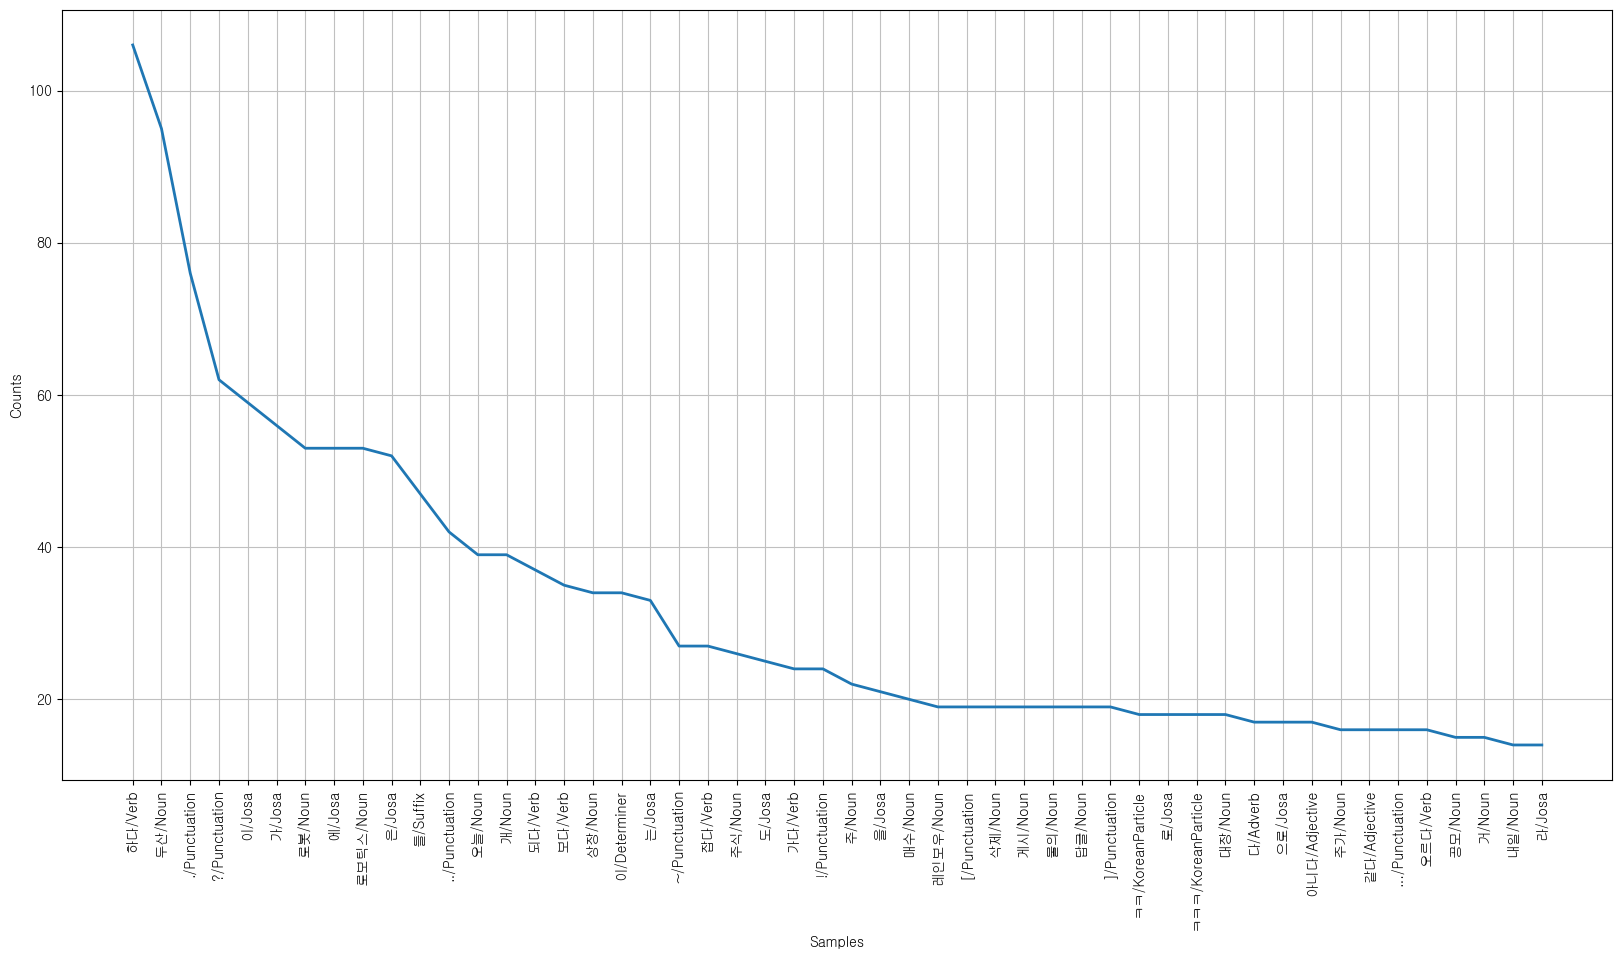

<Axes: xlabel='Samples', ylabel='Counts'>

In [25]:
plt.figure(figsize=(20,10))
text.plot(50)

##### 이제 자주 사용되는 토큰 10000개를 사용해서 데이터를 벡터화를 시키겠습니다.
##### 여기서는 원 핫 인코딩 대신에 CountVectorization을 사용했습니다.
##### 이는 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW(Bag of Words) 인코딩한 벡터를 만드는 역할을 합니다.

In [26]:
# 시간이 꽤 걸립니다! 시간을 절약하고 싶으면 most_common의 매개변수를 줄여보세요.
print(WORD_COUNT)

selected_words = [f[0] for f in text.vocab().most_common(WORD_COUNT)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

100


#### 데이터를 float로 형 변환 시켜주면 데이터 전처리 과정은 끝

In [27]:
x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

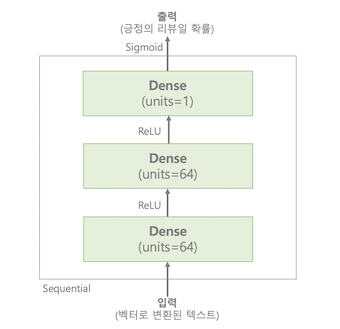

##### 두 개의 Dense 층은 64개의 유닛을 가지고 활성화 함수로는 relu를 사용
####  마지막 계층은 sigmoid 활성화 함수를 사용해서 긍정의 리뷰일 확률을 출력합니다.
##### 손실 함수로는 binary_crossentropy 를 사용
##### RMSProp 옵티마이저를 통해서 경사하강법을 진행
##### 또한 배치 사이즈를 512로, 에포크를 10번으로 학습습니다.

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(WORD_COUNT,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/10
2/2 [==============================] - 1s 15ms/step - loss: -18.2838 - binary_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 18ms/step - loss: -51.1023 - binary_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 16ms/step - loss: -79.2365 - binary_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 15ms/step - loss: -107.9633 - binary_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s 12ms/step - loss: -138.3566 - binary_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s 25ms/step - loss: -171.1930 - binary_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 16ms/step - loss: -206.5033 - binary_accuracy: 0.0000e+00
Epoch 8/10
2/2 [==============================] - 0s 14ms/step - loss: -244.5470 - binary_accuracy: 0.0000e+00
Epoch 9/10
2/2 [==============================] - 0s 14ms/step - loss: -285.3311 - binary_accuracy: 0.0000e+00
Epoc

In [29]:
results

[-267.0218811035156, 0.0]

##### 새로운 데이터로 결과 예측하기

In [54]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    if(score > 0.5):
        print("[{}]는 {:.2f}% 확률로 긍정 댓글로 추측\n".format(review, score * 100))
    else:
        print("[{}]는 {:.2f}% 확률로 부정 댓글로 추측\n".format(review, (1 - score) * 100))
    return score

In [31]:
predict_pos_neg("올해 최고의 영화! 세 번 넘게 봐도 질리지가 않네요.")
predict_pos_neg("배경 음악이 영화의 분위기랑 너무 안 맞았습니다. 몰입에 방해가 됩니다.")
predict_pos_neg("주연 배우가 신인인데 연기를 진짜 잘 하네요. 몰입감 ㅎㄷㄷ")
predict_pos_neg("믿고 보는 감독이지만 이번에는 아니네요")
predict_pos_neg("주연배우 때문에 봤어요")

1/1 [==============================] - 0s 76ms/step
[올해 최고의 영화! 세 번 넘게 봐도 질리지가 않네요.]는 94.87% 확률로 긍정 댓글로 추측

1/1 [==============================] - 0s 12ms/step
[배경 음악이 영화의 분위기랑 너무 안 맞았습니다. 몰입에 방해가 됩니다.]는 98.96% 확률로 긍정 댓글로 추측

1/1 [==============================] - 0s 20ms/step
[주연 배우가 신인인데 연기를 진짜 잘 하네요. 몰입감 ㅎㄷㄷ]는 96.90% 확률로 긍정 댓글로 추측

1/1 [==============================] - ETA: 0s

C:\Users\mary2\AppData\Local\Temp\ipykernel_8908\1752187397.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(data))


1/1 [==============================] - 0s 21ms/step
[믿고 보는 감독이지만 이번에는 아니네요]는 80.59% 확률로 긍정 댓글로 추측

1/1 [==============================] - 0s 16ms/step
[주연배우 때문에 봤어요]는 86.22% 확률로 긍정 댓글로 추측



##### 네이버 댓글 예측
##### 443250 레뷰 코퍼레이션

In [60]:
predict = list()
predict = np.array(get_comments('443250', 1)).T
print(predict)
sum = 0
count = len(predict[TITLE])
for p in predict[TITLE]:
    print(p)
    sum = sum + float(predict_pos_neg(p))
print('최종 긍정 비율은 ' + str(int(( (sum / count) * 100))) + '%입니다')

[['2023.10.15 14:38' '2023.10.14 23:27' '2023.10.14 23:22'
  '2023.10.14 17:55' '2023.10.14 15:01' '2023.10.14 14:33'
  '2023.10.14 14:07' '2023.10.14 14:03' '2023.10.14 12:40'
  '2023.10.14 11:20' '2023.10.14 09:10' '2023.10.13 20:30'
  '2023.10.13 19:47' '2023.10.13 18:42' '2023.10.13 18:30'
  '2023.10.13 18:25' '2023.10.13 18:07' '2023.10.13 17:59'
  '2023.10.13 17:55' '2023.10.13 17:54']
 ['월요일 레뷰코퍼레이션 시나리오.' '23년 10월 14일  23시 전후  현재  YTN 탐사보고서 기록  방송중'
  '당장은 모르겠네요' '금요일 꼭대기에서 입성한 주주에요' '은근슬쩍 찬티 나오는거 보니'
  '이건 얼마나 상승해야 전고점 넘기냐?' '어리섞은 개미들' '레뷰가 밀리의 서재라..' '평단 25인데  갠적생각. '
  '@@밀리의 서재 꼴난다 조심해라@@' '야이 그지새끼들아' '오늘 잘 했네 ㅋㅋㅋ' '기술적반등' '시간외 얼마예요?'
  '아이엠티 갭 크게 뜨길 바래야지..' '차라리' '시외 올려놔야 월요일날 달리지'
  '시간외 개박살날줄 알았는데 양호하네..-1퍼' '아 ㅅㅂ' '시외 마지막타임  ']
 ['572' '858' '676' '881' '680' '888' '681' '553' '668' '399' '497' '798'
  '854' '823' '647' '527' '650' '612' '399' '443']
 ['1' '9' '0' '4' '0' '3' '2' '7' '1' '0' '1' '4' '1' '0' '2' '2' '0' '3'
  '0' '2']
 ['9' '1' '2' '0' '6' '0' '3' '2' '1

C:\Users\mary2\AppData\Local\Temp\ipykernel_8908\2981511326.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(data))


1/1 [==============================] - 0s 45ms/step
[금요일 꼭대기에서 입성한 주주에요]는 81.73% 확률로 긍정 댓글로 추측

은근슬쩍 찬티 나오는거 보니
1/1 [==============================] - 0s 22ms/step
[은근슬쩍 찬티 나오는거 보니]는 85.20% 확률로 긍정 댓글로 추측

이건 얼마나 상승해야 전고점 넘기냐?
1/1 [==============================] - 0s 29ms/step
[이건 얼마나 상승해야 전고점 넘기냐?]는 97.19% 확률로 긍정 댓글로 추측

어리섞은 개미들
1/1 [==============================] - 0s 24ms/step
[어리섞은 개미들]는 90.55% 확률로 긍정 댓글로 추측

레뷰가 밀리의 서재라..
1/1 [==============================] - 0s 14ms/step
[레뷰가 밀리의 서재라..]는 96.42% 확률로 긍정 댓글로 추측

평단 25인데  갠적생각. 
1/1 [==============================] - 0s 32ms/step
[평단 25인데  갠적생각. ]는 83.10% 확률로 긍정 댓글로 추측

@@밀리의 서재 꼴난다 조심해라@@
1/1 [==============================] - 0s 47ms/step
[@@밀리의 서재 꼴난다 조심해라@@]는 79.63% 확률로 긍정 댓글로 추측

야이 그지새끼들아
1/1 [==============================] - 0s 46ms/step
[야이 그지새끼들아]는 94.51% 확률로 긍정 댓글로 추측

오늘 잘 했네 ㅋㅋㅋ
1/1 [==============================] - 0s 31ms/step
[오늘 잘 했네 ㅋㅋㅋ]는 89.33% 확률로 긍정 댓글로 추측

기술적반등
1/1 [==============================] - 0s 34ms

In [1]:
# pyright: reportUnusedImport=false
import requests
from bs4 import BeautifulSoup 
import pandas as pd 
from pandas.tseries.offsets import BDay
import numpy as np

from datetime import datetime, timedelta

# 공모주 청약일정 크롤링하는 함수 정의 ( 38커뮤니케이션 )
def IPO():
    
    # 1. 공모주 청약 일정 크롤링 
    url = "http://www.38.co.kr/html/fund/index.htm?o=k" # 공모주 청약 일정 url 가져오기
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}) 
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    data = soup.find('table', {'summary': '공모주 청약일정'})

    company_list = []
    IPO_date_list = []
    price_list = []
    expected_price_list = []
    competition_list = []
    underwriter_list = []

    data = data.find_all('tr')[1:]

    for row in range(0, len(data)):
        data_list = data[row].text.replace('\xa0\xa0', '').split('\n')[1:-1]
        if len(data_list) < 6:
            continue
            
        if '한국투자증권' in data_list[5] : # 한국투자증권에서 진행하는 종목만 골라내기 
            company_list.append(data_list[0].strip())
            IPO_date_list.append(data_list[1].strip())
            price_list.append(data_list[2].strip())
            expected_price_list.append(data_list[3].strip())
            # competition_list.append(data_list[4].strip())
            underwriter_list.append(data_list[5].strip())

    result = pd.DataFrame({'종목명': company_list,
                        '공모주일정': IPO_date_list,
                        '확정공모가': price_list,
                        '희망공모가': expected_price_list,
                        # '청약경쟁률': competition_list,
                        '주간사': underwriter_list})
    
    result = result.sort_values(by='공모주일정',ignore_index=True)

    
    # 2. 수요예측 일정 추가 
    url = "http://www.38.co.kr/html/fund/index.htm?o=r" # 수요예측 일정 url 가져오기
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}) 
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    data = soup.find('table', {'summary': '수요예측일정'})
    
    company_list = []
    IPO_demand_list = [] 
    
    data = data.find_all('tr')[1:]

    for row in range(0, len(data)):
        data_list = data[row].text.replace('\xa0\xa0', '').split('\n')[1:-1]
        if len(data_list) < 6:
            continue
        
        if '한국투자증권' in data_list[5].strip(): # 한국투자증권에서 진행하는 일정만 골라내기 
            company_list.append(data_list[0].strip())
            IPO_demand_list.append(data_list[1].strip())

    IPO_demand_df = pd.DataFrame({'종목명': company_list, '수요예측일정': IPO_demand_list}).sort_values(by='수요예측일정',ignore_index=True)
    
    result = pd.merge(result,IPO_demand_df, how='outer',on='종목명')
    
    result = result[['종목명','수요예측일정','공모주일정','확정공모가','희망공모가','주간사']]
    
    return result


# 공모주 배정/환불 스케쥴 추가하기 
def IPO_refund(data): 

    # 배정일은 청약 시작일 + 2영업일 
    # 환불일은 청약 시작일 + 3영업일 
    
    s_date = data['공모주일정'].values.tolist() # 청약 시작일 
    assign_date = [] 
    refund_date = [] 
    
    # datetime 적용을 위해 데이터 전처리 
    for date in s_date:
        date = datetime.strptime(date.split('~')[0].replace('.','-'), '%Y-%m-%d')
        assign_date.append( str(date + BDay(2)).split(' ')[0] )
        refund_date.append( str(date + BDay(3)).split(' ')[0] )
        
    
    assign_df = pd.DataFrame(assign_date)
    refund_df = pd.DataFrame(refund_date)
    
    data.insert(3,"배정일정",assign_df)
    data.insert(4,"환불일정",refund_df)
    
    return data 


def IPO_date():
    hantu_IPO_data = IPO() 
    result = []
    for data in IPO_refund(hantu_IPO_data).values.tolist() :
        # 청약마감일 
        end = datetime.strptime(data[2].split('~')[0][:4]+'-'+data[2].split('~')[1].replace('.','-'), '%Y-%m-%d')
        
        if end.weekday() == 4 : end = str(end + timedelta(days=1)).split(' ')[0]  # 청약마감일이 금요일 일 때, 
        else: end = str(end+BDay(1)).split(' ')[0] # 청약마감일이 금요일이 아닐 때 
          
        result.append({'종목명':data[0], '수요예측일':str(data[1]).split('~')[0].replace('.','-'), '청약일':data[2].split('~')[0].replace('.','-'), '배정일':data[3].replace('-','.').replace('.','-'),'환불일':data[4].replace('-','.').replace('.','-'),'희망공모가':data[6],'주간사':data[7], '청약마감일': end})


    return result 

result = IPO_date()
print(result)

[{'종목명': '두산로보틱스', '수요예측일': 'nan', '청약일': '2023-09-21', '배정일': '2023-09-25', '환불일': '2023-09-26', '희망공모가': '21,000~26,000', '주간사': '한국투자증권,미래에셋증권,NH투자증권,KB증권,크레디트스위스증권', '청약마감일': '2023-09-23'}, {'종목명': '퀄리타스반도체', '수요예측일': 'nan', '청약일': '2023-10-18', '배정일': '2023-10-20', '환불일': '2023-10-23', '희망공모가': '13,000~15,000', '주간사': '한국투자증권', '청약마감일': '2023-10-20'}, {'종목명': '한국스팩13호', '수요예측일': '2023-10-25', '청약일': '2023-11-01', '배정일': '2023-11-03', '환불일': '2023-11-06', '희망공모가': '2,000~2,000', '주간사': '한국투자증권', '청약마감일': '2023-11-03'}]
